In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [19]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [20]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [21]:
print(df.tail())

         Values
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000


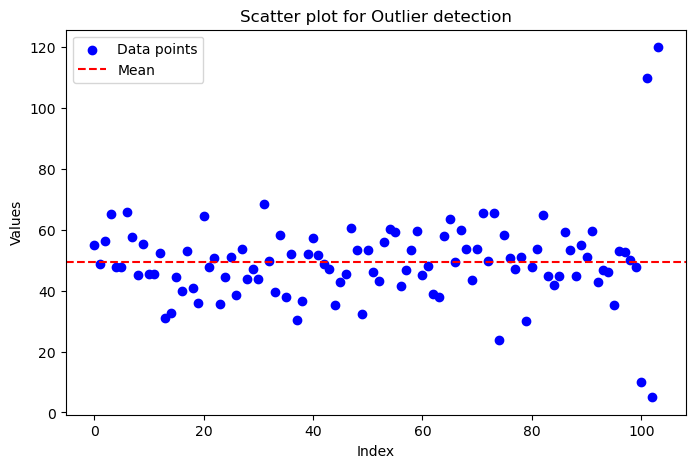

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter plot for Outlier detection')
plt.legend()
plt.show()

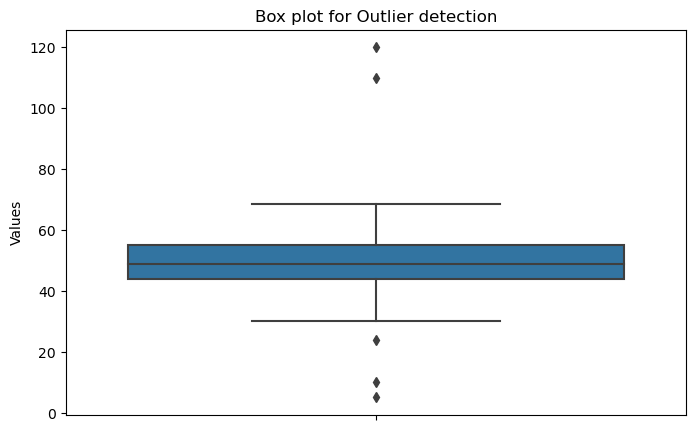

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title('Box plot for Outlier detection')
plt.show()

***Z-score method***

 z = (x-μ)/σ

In [25]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x: 'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


***Interquartile Range(IQR)***

IQR = Q3 - Q1

lower bound = Q1 - 1.5*IQR

upper bound = Q3 + 1.5*IQR

In [34]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lb= Q1 - 1.5*IQR
ub= Q3 + 1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x: 'Outlier' if (x < lb or x > ub) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [38]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)
IQR=Q3-Q1
lb= Q1 - 1.5*IQR
ub= Q3 + 1.5*IQR
outliers=data[(data < lb) | (data > ub)]
print(f"5-Number Summary:\nMin: {min_value}, Q1: {Q1}, Median(Q2): {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lb}, Upper Bound: {ub}")
print(f"Outliers: {outliers}")

5-Number Summary:
Min: 5.0, Q1: 43.874401021766715, Median(Q2): 48.73043708220287, Q3: 55.00852473036764, Max: 120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]
